<a href="https://colab.research.google.com/github/VallabhK/MachineLearning/blob/master/RealEstatePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Housing Price Prediction 
---
Problem Statement: We are given dataset of house prices with some features like no. of bathrooms, no. of bedrooms, etc. Our task is to create a model which will predict the price for any new house by looking at features

In [1]:
 import pandas as pd

In [4]:
url='https://raw.githubusercontent.com/VallabhK/MachineLearning/master/HousingData.csv?token=AIB6MQL4HNY5RLI5WGXVULLAWPVUS'
housingDataframe = pd.read_csv(url)

In [5]:
 housingDataframe.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [6]:
housingDataframe.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
%matplotlib inline

In [8]:
import matplotlib.pyplot as plt

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9641bb0790>,
      dtype=object)

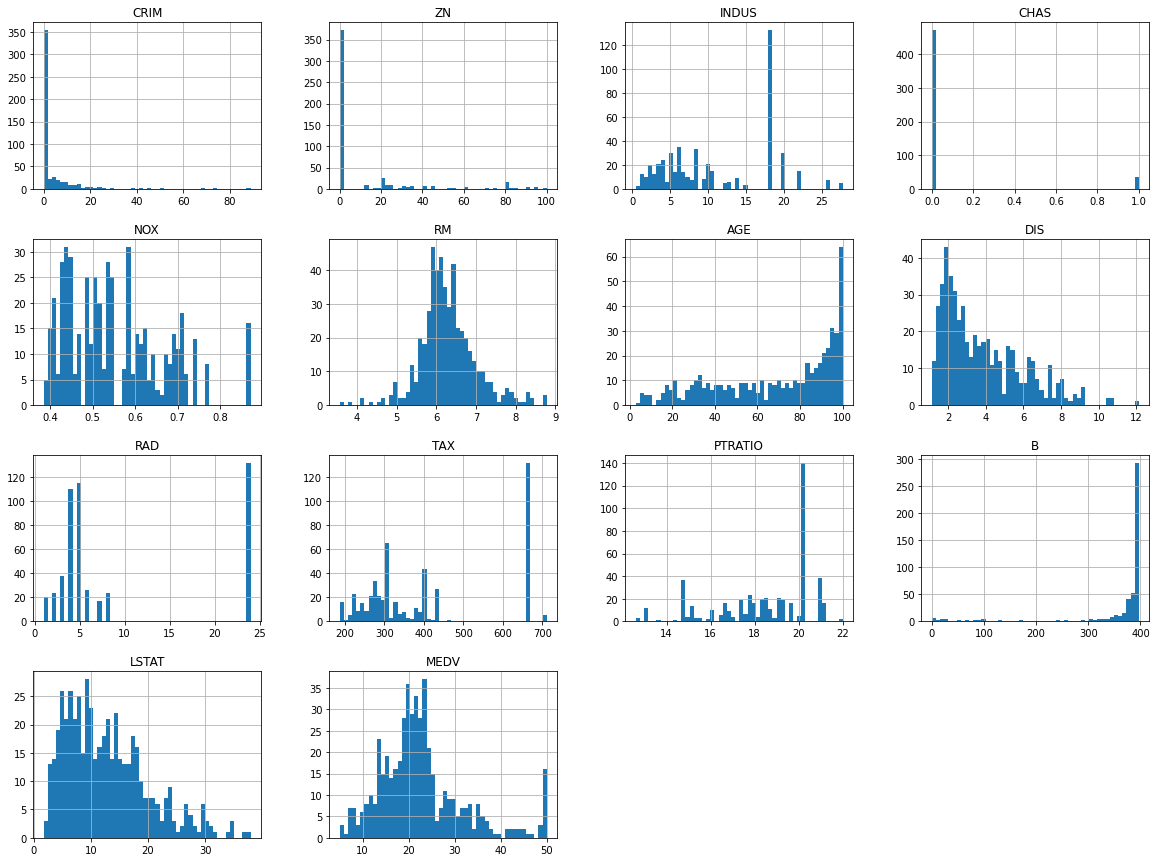

In [9]:
housingDataframe.hist(bins=50, figsize=(20,15))

##Train Test Splitting

In [10]:
import numpy as np


In [11]:
def split_train_test(data, test_ratio):
  np.random.seed(42)
  shuffledData = np.random.permutation(len(data))
  test_set_size = int(len(data)*test_ratio)
  test_indices = shuffledData[:test_set_size]
  train_indices = shuffledData[test_set_size:]
  return data.iloc[train_indices], data.iloc[test_indices]

In [12]:
train_set, test_set = split_train_test(housingDataframe, 0.2)

In [13]:
print(f"Rows in train:{len(train_set)}\nRows in test:{len(test_set)}\n")

Rows in train:405
Rows in test:101



In [14]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housingDataframe, housingDataframe['CHAS']):
  strat_train_set = housingDataframe.loc[train_index]
  strat_test_set = housingDataframe.loc[test_index]

In [15]:
strat_test_set.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,3.655942,13.450980,10.312255,0.068627,0.541353,6.303353,66.733333,3.988460,8.813725,391.980392,18.385294,369.670196,12.104314,22.625490
std,10.400966,27.503241,6.761154,0.254068,0.111397,0.662996,27.772183,2.131247,8.614667,167.837379,2.310604,68.075774,6.759257,8.452344
min,0.009060,0.000000,0.460000,0.000000,0.385000,4.138000,6.500000,1.137000,1.000000,188.000000,12.600000,3.650000,2.470000,5.000000
25%,0.057828,0.000000,4.950000,0.000000,0.448000,5.912750,45.850000,2.223650,4.000000,270.000000,16.800000,377.685000,7.480000,18.925000
50%,0.176150,0.000000,7.760000,0.000000,0.515000,6.176000,71.100000,3.422950,5.000000,307.000000,19.150000,393.740000,10.565000,21.500000
75%,2.061955,0.000000,18.100000,0.000000,0.612750,6.539500,93.500000,5.609225,8.000000,461.000000,20.200000,396.900000,16.267500,25.000000
max,88.976200,90.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.585700,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [16]:
#Correlations in data
correlation_matrix= strat_train_set.corr()

In [17]:
correlation_matrix['MEDV'].sort_values(ascending =False) #Check what all parameters are related to MEDV as this is the target value

MEDV       1.000000
RM         0.679894
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9641078650>,
      dtype=object)

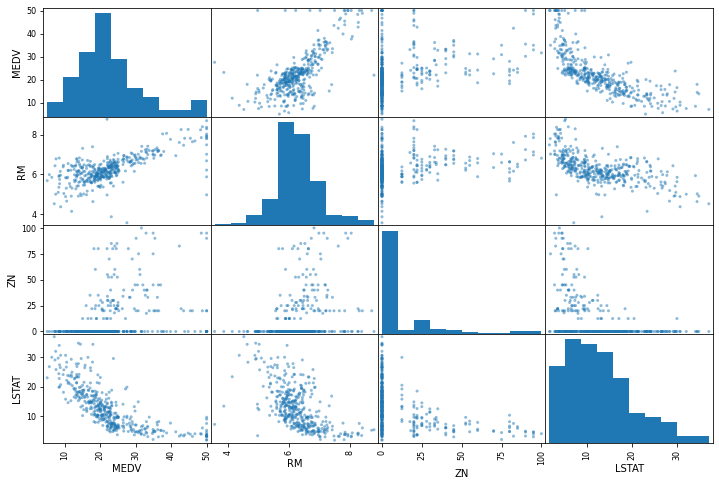

In [18]:
from pandas.plotting import scatter_matrix 
attributes =['MEDV','RM', 'ZN','LSTAT']
scatter_matrix(strat_train_set[attributes], figsize =(12,8))

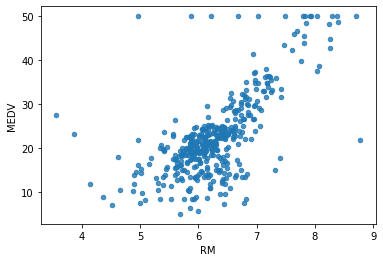

In [19]:
strat_train_set.plot(kind='scatter', x='RM', y='MEDV', alpha=0.8)

In [20]:
#Trying out attribute combinations
#strat_train_set['TAXRM']= strat_train_set['TAX']/strat_train_set['RM']

In [21]:
#correlation_matrix= strat_train_set.corr()
#correlation_matrix['MEDV'].sort_values(ascending =False)

In [22]:
#strat_train_set.plot(kind='scatter', x='TAXRM', y='MEDV', alpha=0.8)

In [23]:
from sklearn.impute import SimpleImputer

In [24]:
#Feature Scaling using Standardization
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
my_pipeline = Pipeline([
                        ('imputer', SimpleImputer(strategy='median')),
                        ('std_scaler', StandardScaler()),
                        ])

In [25]:
strat_train_label =strat_train_set['MEDV']
strat_train_set.drop('MEDV', axis=1, inplace=True)

In [26]:
train_transform = my_pipeline.fit_transform(strat_train_set)

In [28]:
#Model Selection
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
#model = LinearRegression()
model = RandomForestRegressor()
model.fit(train_transform, strat_train_label)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [29]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,train_transform, strat_train_label, scoring='neg_mean_squared_error')
rmse_scores=np.sqrt(-scores)

In [30]:
rmse_scores

array([2.80536985, 3.63182362, 3.16088774, 4.23824433, 3.22860195])

In [31]:
rmse_scores.mean()

3.412985499275739

In [34]:
from sklearn.metrics import mean_squared_error

In [35]:
x_test = strat_test_set.drop('MEDV', axis=1)
y_test = strat_test_set['MEDV'].copy()
x_test_prepared = my_pipeline.transform(x_test)
final_prediction = model.predict(x_test_prepared)
mse = mean_squared_error(y_test, final_prediction)
rmse = np.sqrt(mse)

In [36]:
rmse

2.961858053224525